# Chapter 9. Controlling the Overall Appearance of Graphs

> The grammar of graphics that underlies **ggplot2** is concerned with how data is processed and displayed—it’s not concerned with things like fonts, background colors, and so on. **ggplot2**’s theming system provides control over the appearance of nondata elements.

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 9.1 Setting the Title of a Graph

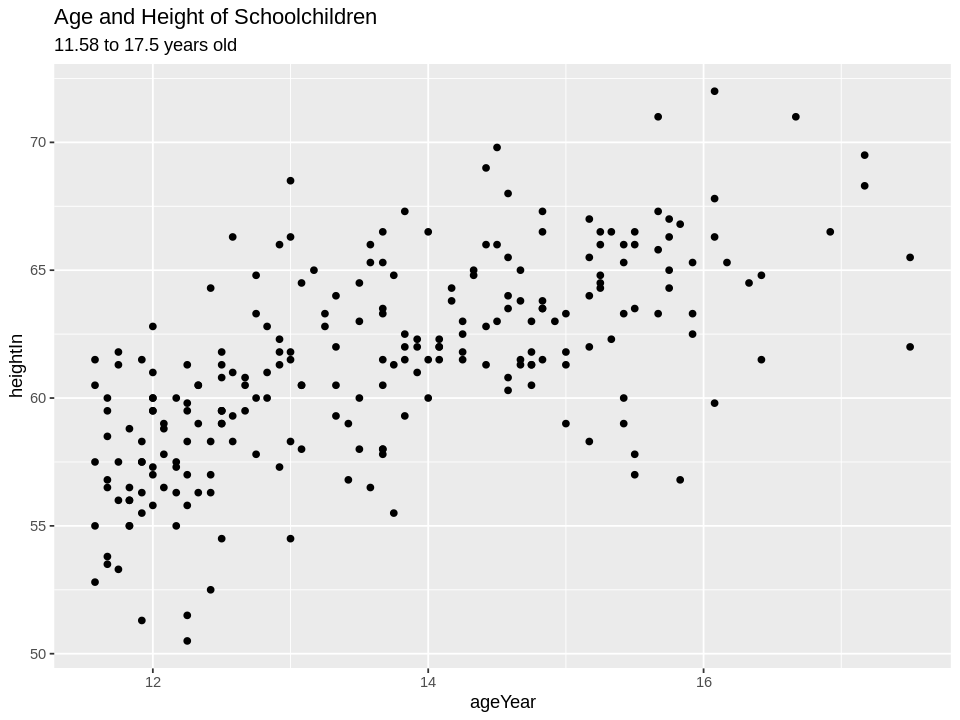

In [2]:
qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  ggtitle(
    "Age and Height of Schoolchildren",
    str_interp("${min(gcookbook::heightweight$ageYear)} to ${max(gcookbook::heightweight$ageYear)} years old")
  )

## 9.2 Changing the Appearance of Text

> There are two kinds of text items in **ggplot2**: theme elements and text geoms. Theme elements are all the nondata elements in the plot: the title, legends, and axes. Text geoms are things that are part of the plot itself, and reflect the data content.

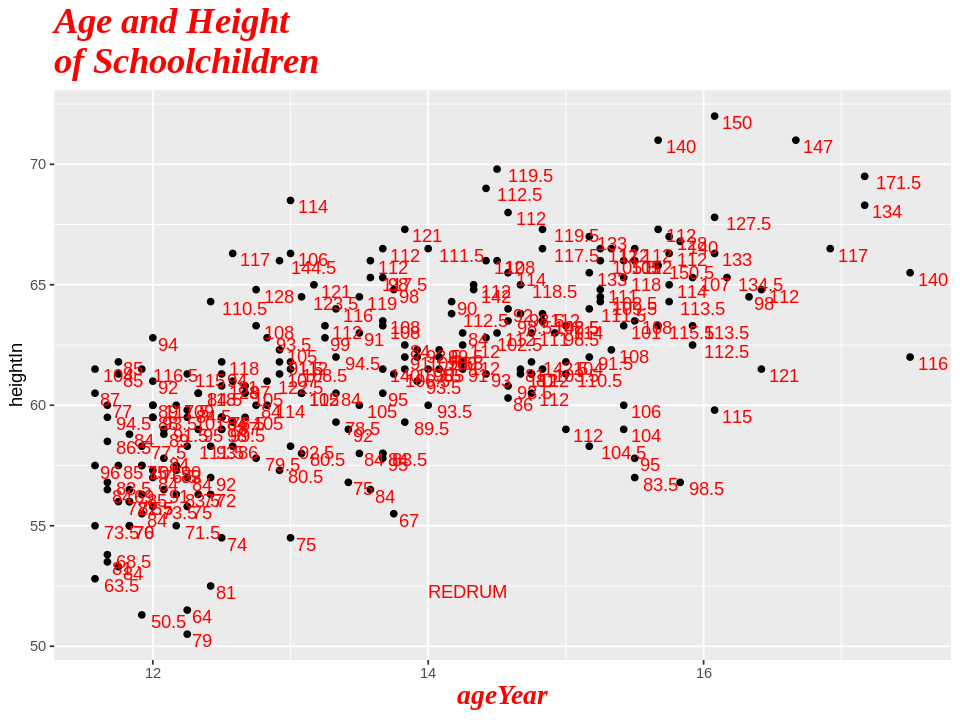

In [3]:
qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  geom_text(aes(label = weightLb), color = "red", hjust = -.25, vjust = 1) +
  annotate(
    "text",
    color = "red",
    hjust = 0,
    label = "REDRUM",
    vjust = 0,
    x = 14,
    y = 52,
  ) +
  ggtitle("Age and Height\nof Schoolchildren") +
  theme(
    axis.title.x = element_text(
      color = "red",
      face = "bold.italic",
      family = "Times",
      lineheight = .9,
      size = rel(1.5)
    ),
    plot.title = element_text(
      color = "red",
      face = "bold.italic",
      family = "Times",
      lineheight = .9,
      size = rel(2)
    ),
  )

## 9.3 Using Themes

> Another theme included in **ggplot2** is `theme_void()`, which makes all plot elements blank and only shows your data.

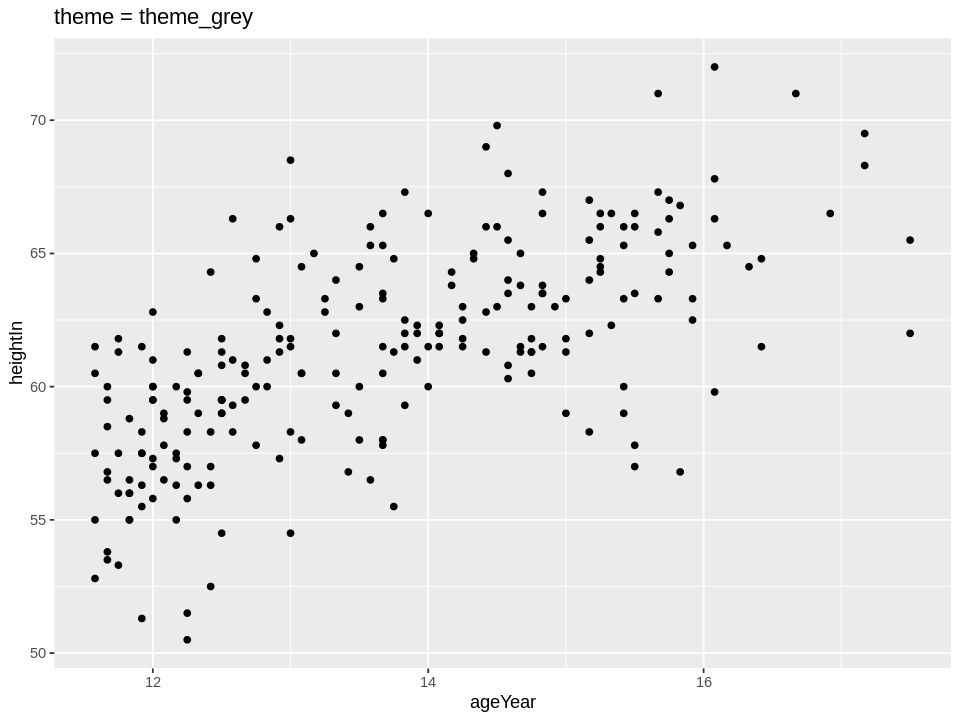

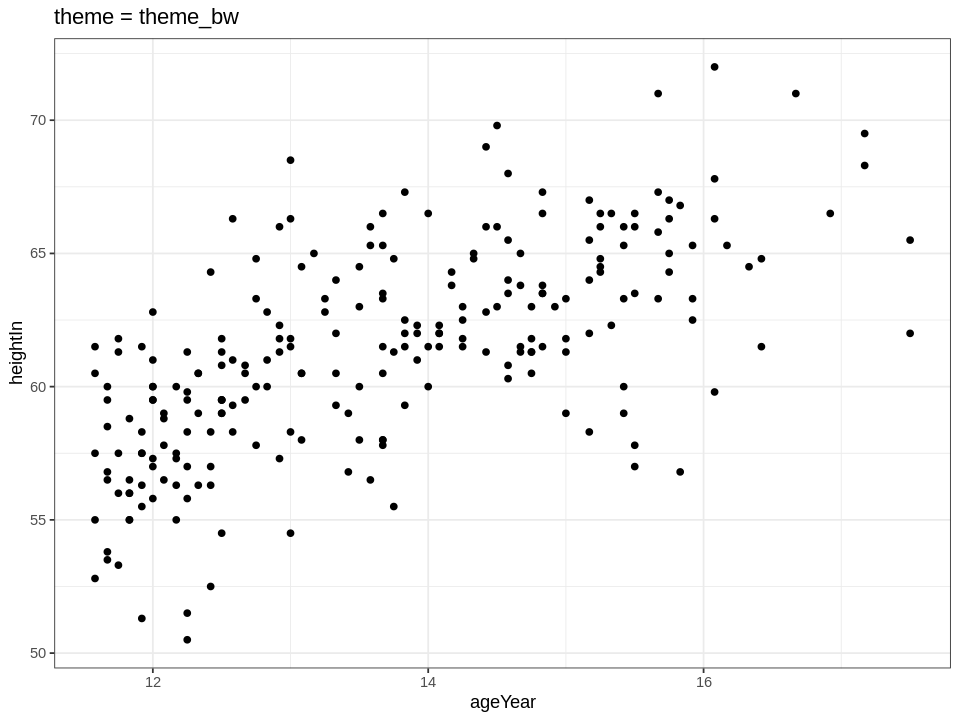

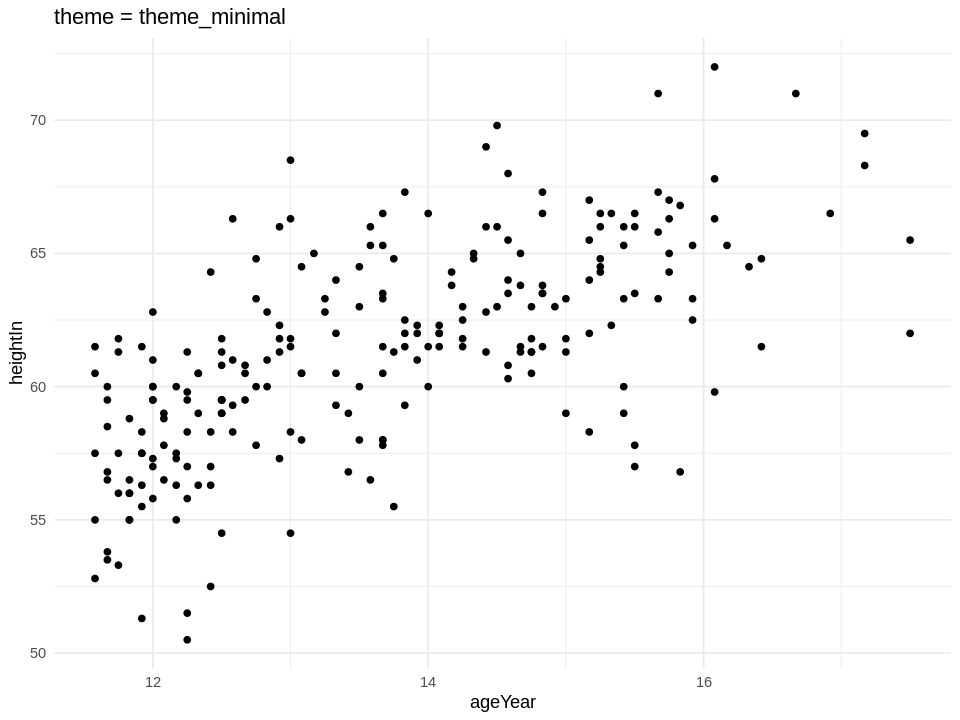

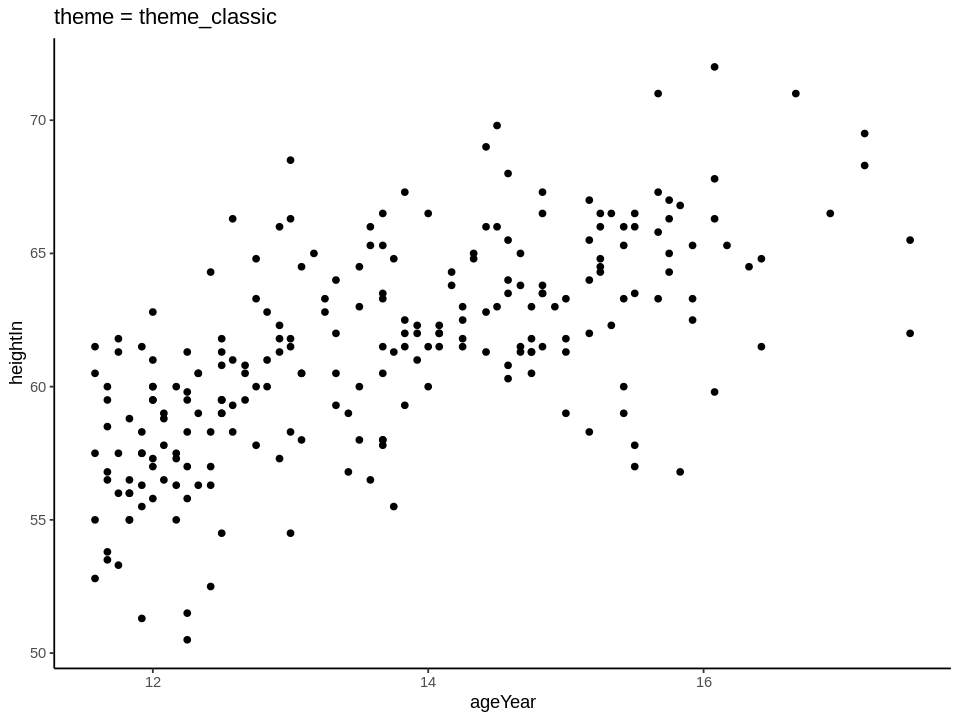

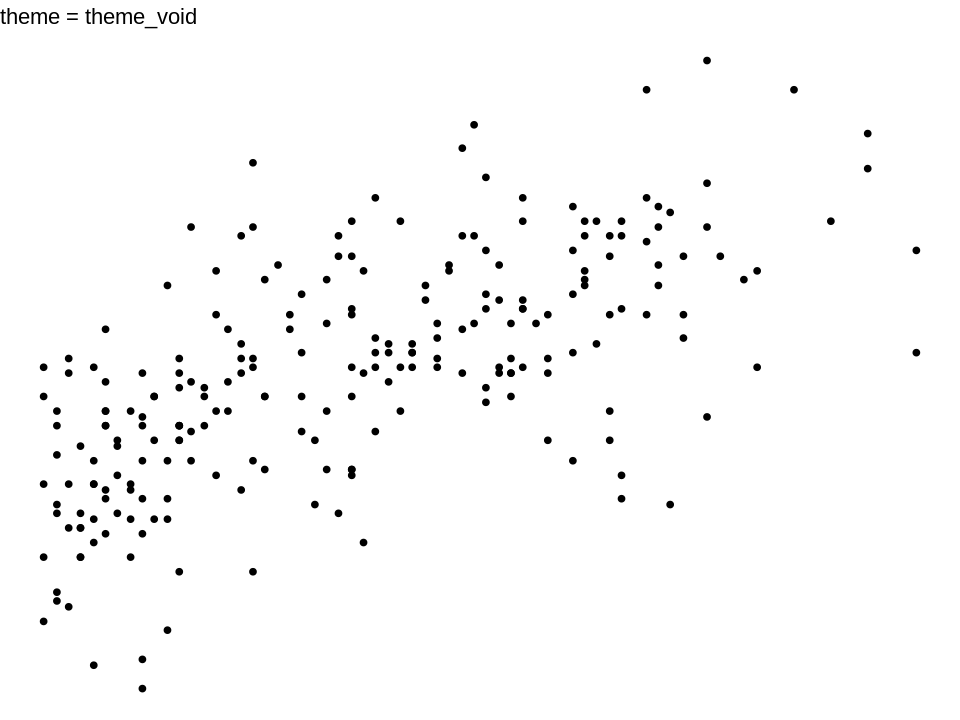

In [4]:
for (theme_f in c(
  "theme_grey",
  "theme_bw",
  "theme_minimal",
  "theme_classic",
  "theme_void"
)) {
  print(
    qplot(ageYear, heightIn, data = gcookbook::heightweight) +
      get(theme_f)() +
      ggtitle(str_interp("theme = ${theme_f}"))
  )
}

## 9.4 Changing the Appearance of Theme Elements

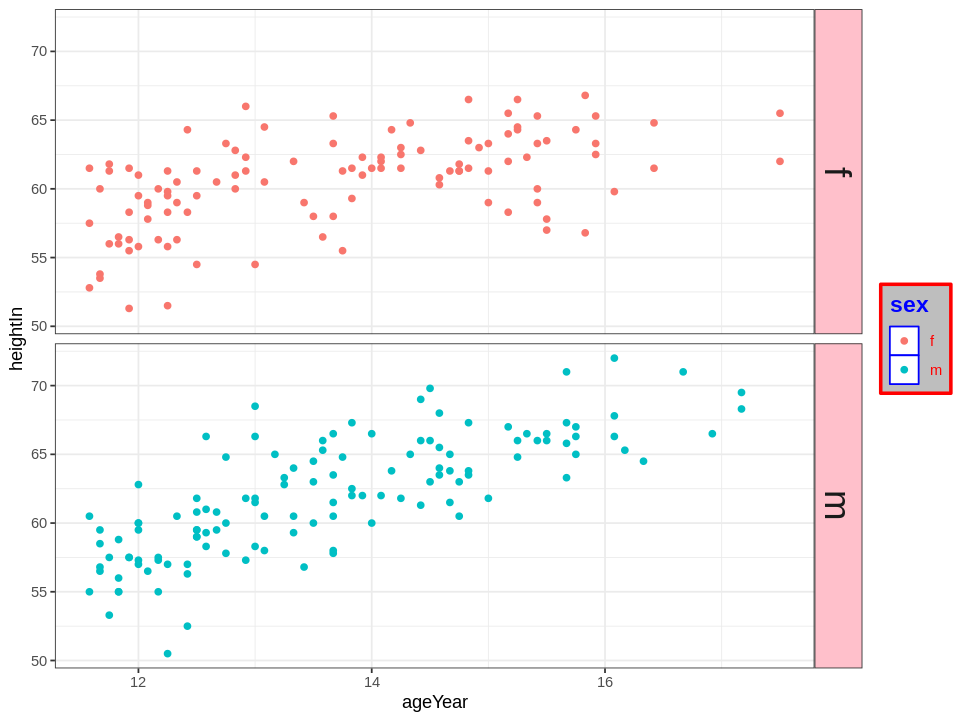

In [5]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  facet_grid(sex ~ .) +
  theme_bw() +
  theme(
    legend.background = element_rect(color = "red", fill = "grey", size = rel(2)),
    legend.key = element_rect(color = "blue"),
    legend.text = element_text(color = "red"),
    legend.title = element_text(color = "blue", face = "bold", size = rel(1.25)),
    strip.background = element_rect(fill = "pink"),
    strip.text = element_text(size = rel(2)),
  )

## 9.5 Creating Your Own Themes

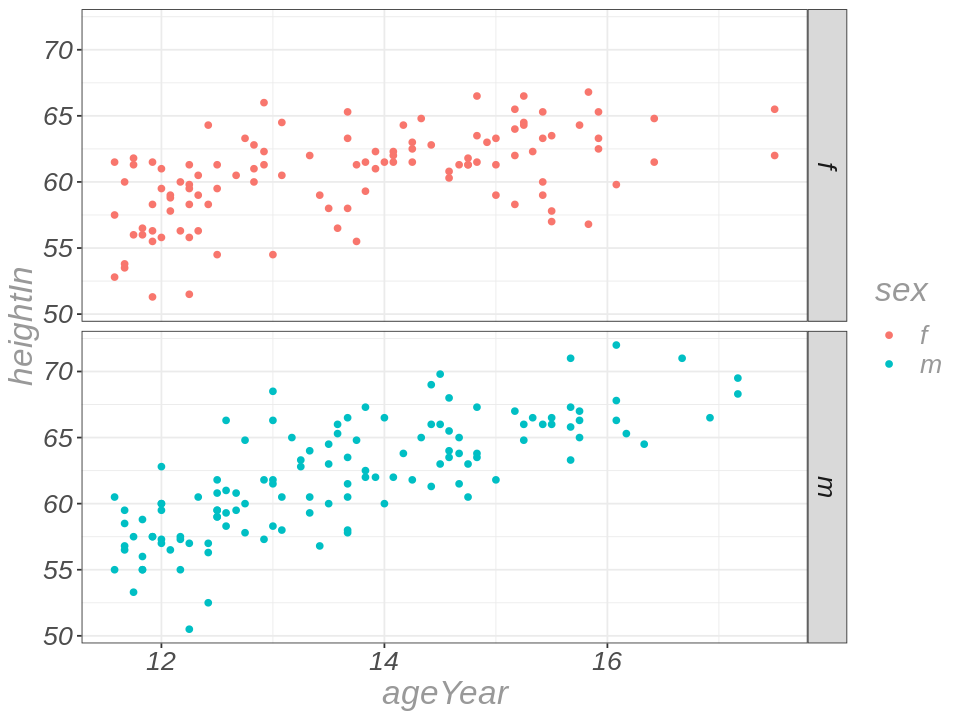

In [6]:
theme_custom <- theme(text = element_text(color = "grey60", face = "italic", size = 20))

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  facet_grid(sex ~ .) +
  theme_bw() +
  theme_custom

## 9.6 Hiding Grid Lines

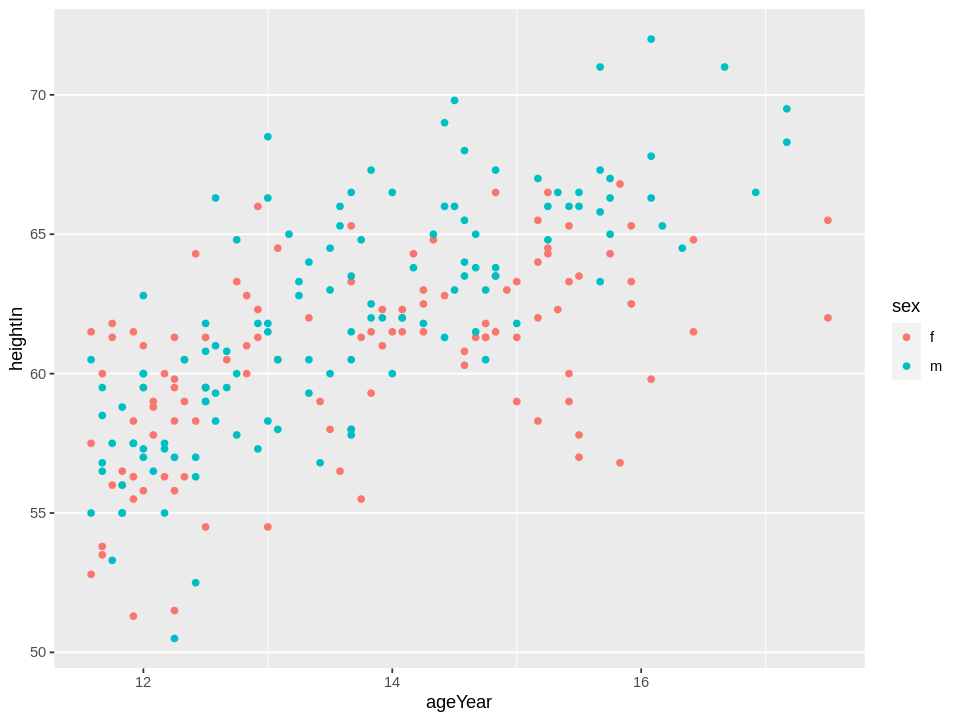

In [7]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.y = element_blank(),
  )